# Week 11 - Function Architectures
## Yada Pruksachatkun 

## Important Notes 
One failing of polynomials is that they have a hard time matching a function that has a pole

a simple pole is equivalent to an infinite-order power series.

if a function has some known Taylor expansion, we can hav eit matched up to some order int eh Pade approxmiate. 

Another problem with global polynomials is that they have a hard time following local behavior, resulting in undesirable artifacts such as overshooting and ringing

 Splines are not commonly used for data fitting or functional approximation, because they require finding and keeping track of the bound- aries as well as the coefficients, but they are the workhorse of computer graphics, where they are used to represent curves and surfaces.
 
 To be useful for an interactive application such as computer graphics it must be possible to make a local change and not have to recompute the entire curve. Nonuniform B-splines provide a clever solution to this problem [Foley et al., 1990]. The “B” part refers to the bases the polynomials provide, and the “nonuniform” part refers to the flexibility in defining how they join together
 
 The φi’s are the basis (or blending) functions that weight the control points. The basis functions are found recursively:
 
 B-splines can be generalized to higher dimensions, parameterized by more than one degree of freedom.
 
 Expansions that let successive corrections be added without changing lower-order ap- proximations are done with orthogonal functions, - You can find higher level reprsentations iwthout computing the lower order functions. Sso you can project upon a higher space. 
 
 Assume that we’re given an arbitrary complete set of basis functions φi(⃗x) that can represent any function of interest, for example polynomials up to a specified order. An orthonormal set fi can be constructed by Gram–Schmidt orthogonalization.
 
 Matching data that isn’t similarly diverging requires a delicate balancing of the coefficients, resulting in a function that is increasingly “wiggly
 
 Radial basis functions (RBFs) offer a sensible alternative to the hopeless practice of fighting divergences with still faster divergences
 
 . And unlike splines the basis functions are defined everywhere, eliminating the need to keep track of element boundaries.
 
 In fact, a possibly counter-intuitive result is that these diverging basis functions can have better error convergence properties than local ones 
 
 There are basis functions that are linear and non-linear. 
 
 To do the second order polynoial fit, in 1d to 2d, it increases from 3 to 6 terms. 
 In a high dimensional space, eveyrthing is surface.   
Nonlinear coefficients are able to steer tehe basis funcitons where they are needed in a high dimensional space. 
In low dimensions use linear coefficients, in high dimensions use nonlienar coefficients.  
High dimesniotal spac,e evyethitn gis surface. 
 Space distributions are all edges. 
 
 In neural networks, waht about  regualrization? 
 
  In fact, it is common for neural networks to have more parameters than the size of the training data set! Unlike a polynomial fit, the network can choose from a much larger space of possible models. The order of a polynomial restricts how many variables can interact; in a neural network all of the variables can always interact (although some of the connections will decay during training).
  This can be don eusing early stopping. 
  no prior knowledge
  What is meant by prior knowledg ein neural networks?
 

### 14.2) Take as a data set x = {−10,−9,...,9,10}, and y(x) = 0 if x ≤ 0 and y(x) = 1 if x > 0.
#### (a) Fit the datawithapolynomialwith5,10,and15terms,usingapseudo-inverse of the Vandermonde matrix.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

x = np.arange(-10,10,0.1)
b = (x>0).astype(np.float32)
x = list(zip(x,b))
x_vis = np.arange(-10.5, 10.5, .1)


In [2]:
def create_vandermondt(x, order):
    A = np.zeros((len(x), order)) # vanderbaldt  
    b = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(A[0])):
            try:
                A[i, j] = x[i][0]**j # raise to the jth power
            except:
                A[i,j] = x[i]**j
        try:
            b[i] = x[i][1]
        except:
            b[i] = x[i]
    return A,b


# here, all matrix kreation funcitons must have 2 paramters
def fit(x_input, create_matrix):
    res = []
    for order in [5, 10, 15]:
        A,b = create_matrix(x, order)
        A = A.T
        c = np.linalg.pinv(A.T)@b # get the coefficients 
        A,b = create_matrix(x_input,order)
        A = A.T
        error = np.mean(np.square(b - A.T@c)) # least square mena error 
        A, b = create_matrix(x_input, order)
        A = A.T
        measured = A.T@c # this is the y 
        res.append((order, error, measured))
    return res

v = fit(x, create_vandermondt)



    

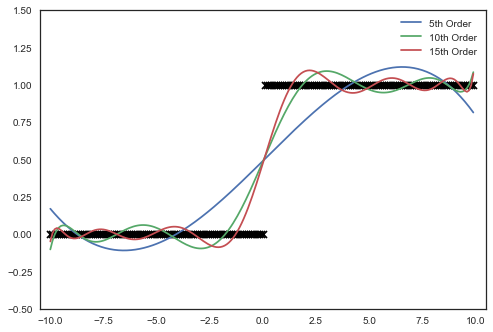

In [3]:
def plot(x, v):
    plt.figure()
    scatter = list(zip(*x))
    plt.scatter(scatter[0], scatter[1], color='k', marker='x')
    plt.xlim([-10.5, 10.5])
    plt.ylim([-.5, 1.5])
    for res_order in v:
        order = res_order[0]
        error = res_order[1]
        c = res_order[2]
        plt.plot(scatter[0], c, label=str(order)+"th Order")
    plt.legend()
    plt.show()
plot(x, v)


#### (b) Fit the data with 5, 10, and 15 r3 RBFs uniformly distributed between x = −10 and x = 10.

In [4]:
def create_RBF(x, order):
    c = np.arange(-10, 10, 20//order)
    R = np.zeros((len(x),order))
    b = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(R[0])):
            R[i, j] = np.abs(x[i][0] - c[j])**3 
        b[i] = x[i][1]
    return R, b
    
rbf_fit = fit(x, create_RBF)
print(len(rbf_fit[0][2]))


200


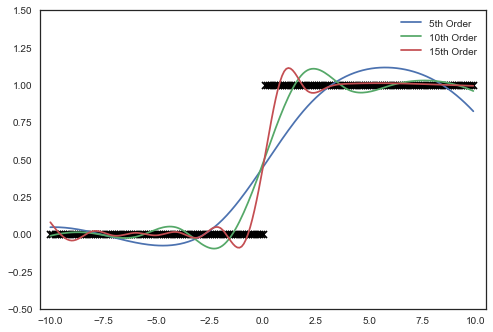

In [5]:
plot(x,rbf_fit)

Here, you can see RBF works a lot  better than Vandermoldt

### (c) Using the coefficients found for these six fits, evaluate the total out-of-sample error at x = {−10.5, −9.5, . . . , 9.5, 10.5}.


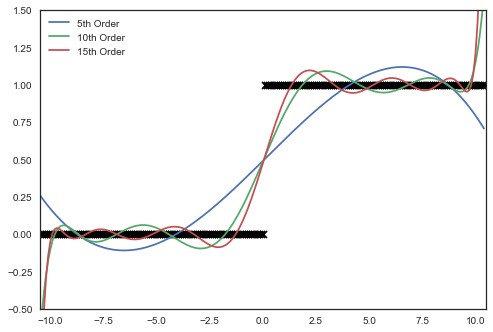

In [6]:
plt.figure()
out_of_sample = np.arange(-10.5, 10.5, 0.1) # creating from -10 to 10. 
b = (out_of_sample>0).astype(np.float32)
out_of_sample = list(zip(out_of_sample,b))

polynomial_fit = fit(out_of_sample, create_vandermondt)
rbf_fit = fit(out_of_sample, create_RBF)

# first, plot the out of sample data 
plot(out_of_sample, polynomial_fit)

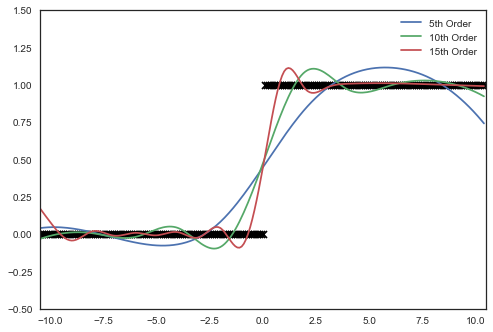

In [7]:
plot(out_of_sample, rbf_fit)

In [8]:
print("For polynoimal fit, the error for 5, 10, and 15 terms is")
error = list(zip(*polynomial_fit))[1]
print(error)
print("For RBF fit, the error for 5, 10, and 15 terms is")
error = list(zip(*rbf_fit))[1]
print(error)


For polynoimal fit, the error for 5, 10, and 15 terms is
(0.036180448147060409, 0.022958581950473095, 0.050291062946092147)
For RBF fit, the error for 5, 10, and 15 terms is
(0.024871205951446582, 0.011946069936312351, 0.0064468550182574767)


(d) Using a 10th-order polynomial, fit the data with the curvature regularizer in equation (14.47), and plot the fits for λ = 0, 0.01, 0.1, 1 (this part is harder than the others).